# Preprocessing

## Imports

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option("expand_frame_repr", False)
pd.set_option('display.float_format', '{:.2f}'.format)

In [3]:
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from dvc_helper import DvcHelper
from df_overview import DfOverview
from df_cleaner import DfCleaner
from df_outlier import DfOutlier
import vis_seaborn as vis_seaborn
import vis_plotly as vis_plotly

2021-07-26 18:11:06,150 — DfOverview — DEBUG — Loaded successfully!
2021-07-26 18:11:06,154 — DfCleaner — DEBUG — Loaded successfully!
2021-07-26 18:11:06,159 — DfOutlier — DEBUG — Loaded successfully!


## Data

In [4]:
dvc_helper = DvcHelper()

In [5]:
missing_values = ["n/a", "na", "undefined"]

df_store = dvc_helper.read_csv('../data/store.csv', missing_values)
df_train = dvc_helper.read_csv('../data/train.csv', missing_values)
df_test = dvc_helper.read_csv('../data/test.csv', missing_values)

2021-07-26 18:11:06,484 — DfHelper — DEBUG — file read as csv
2021-07-26 18:11:06,975 — DfHelper — DEBUG — file read as csv
2021-07-26 18:11:07,010 — DfHelper — DEBUG — file read as csv


In [6]:
print(df_store.info())
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dty

## Missing value

In [7]:
cleaner = DfCleaner()

Let's start by getting detailed overview the store data

In [8]:
store_overview = DfOverview(df_store)
store_overview.getOverview()

,count,none_count,none_percentage,unique_value_count,unique_percentage,min_value,max_value,mean,median,dtype
label,,,,,,,,,,
Store,1115.00,0,0.0%,1115,100.0%,1.00,1115.00,558.00,558.00,int64
StoreType,1112.00,0,0.0%,4,0.36%,20.00,75860.00,5404.90,2325.00,object
Assortment,761.00,0,0.0%,3,0.27%,1.00,12.00,7.22,8.00,object
Promo2,571.00,0,0.0%,2,0.18%,2009.00,2015.00,2011.76,2012.00,int64
CompetitionDistance,761.00,3,0.27%,654,58.65%,1900.00,2015.00,2008.67,2010.00,float64
CompetitionOpenSinceMonth,1115.00,354,31.75%,12,1.08%,0.00,1.00,0.51,1.00,float64
CompetitionOpenSinceYear,571.00,354,31.75%,23,2.06%,1.00,50.00,23.60,22.00,float64


In the store dataset, there are three columns with null value. `CompetitionDistance`, `CompetitionOpenSinceMonth` and `CompetitionOpenSinceYear`. There are only 3 missing values in
`CompetitionDistance`, Since they are small we can impute them with median. For both `CompetitionOpenSinceMonth` and `CompetitionOpenSinceYear` having null value is meaning full. It means competition for a store has already been there before the store is established thus, their start month and year is unknown. We can convey similary meaning by replacing them with 0.

In [9]:
df_store = cleaner.fill_with_median(df_store, ['CompetitionDistance'])
df_store.fillna(0, inplace=True)

In [10]:
store_overview = DfOverview(df_store)
store_overview.missing_value()

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Now lets look at training data

In [11]:
train_overview = DfOverview(df_train)
train_overview.getOverview()


,count,none_count,none_percentage,unique_value_count,unique_percentage,min_value,max_value,mean,median,dtype
label,,,,,,,,,,
Store,1017209.00,0,0.0%,1115,0.11%,1.00,1115.00,558.43,558.00,int64
DayOfWeek,1017209.00,0,0.0%,7,0.0%,1.00,7.00,4.00,4.00,int64
Date,1017209.00,0,0.0%,942,0.09%,0.00,41551.00,5773.82,5744.00,object
Sales,1017209.00,0,0.0%,21734,2.14%,0.00,7388.00,633.15,609.00,int64
Customers,1017209.00,0,0.0%,4086,0.4%,0.00,1.00,0.83,1.00,int64
Open,1017209.00,0,0.0%,2,0.0%,0.00,1.00,0.38,0.00,int64
Promo,1017209.00,0,0.0%,2,0.0%,0.00,1.00,0.18,0.00,int64


The training data is perfect. No Null values. This can't be coincedence, I think this data is cleaned before.

In [12]:
test_overview = DfOverview(df_test)
test_overview.getOverview()

,count,none_count,none_percentage,unique_value_count,unique_percentage,min_value,max_value,mean,median,dtype
label,,,,,,,,,,
Id,41088.00,0,0.0%,41088,100.0%,1.00,41088.00,20544.50,20544.50,int64
Store,41088.00,0,0.0%,856,2.08%,1.00,1115.00,555.90,553.50,int64
DayOfWeek,41088.00,0,0.0%,7,0.02%,1.00,7.00,3.98,4.00,int64
Date,41077.00,0,0.0%,48,0.12%,0.00,1.00,0.85,1.00,object
Promo,41088.00,0,0.0%,2,0.0%,0.00,1.00,0.44,0.00,int64
Open,41088.00,11,0.03%,2,0.0%,0.00,1.00,0.40,0.00,float64


This is also almost perfect. Only 11 entries in `Open` column are null. We can just drop those.

In [13]:
df_test = cleaner.drop_rows(df_test, 'Open', None)

In [14]:
test_overview = DfOverview(df_test)
test_overview.missing_value()

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

## Outlier treating

As before we will start with the store data. Here the only column we should consider is `CompetitionDistance` because the others have fewer unique values.

In [24]:
df_outliers = DfOutlier(df_store[['CompetitionDistance']].copy())
overview = df_outliers.getOverview()
overview

,number_of_outliers,percentage_of_outliers,skew,Q1,median,Q3,min_value,max_value,mean
label,,,,,,,,,
CompetitionDistance,108,9.69%,2.93,720.00,2325.00,6875.00,20.00,75860.00,5396.61


<AxesSubplot:>

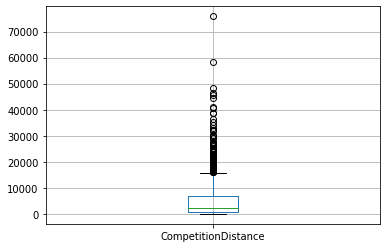

In [26]:
df_store[['CompetitionDistance']].boxplot()

Now lets look at the training data. Here we should consider `Sales` and `Customers`.

In [28]:
df_outliers = DfOutlier(df_train[['Sales', 'Customers']].copy())
overview = df_outliers.getOverview()
overview

,number_of_outliers,percentage_of_outliers,skew,Q1,median,Q3,min_value,max_value,mean
label,,,,,,,,,
Sales,26694,2.62%,0.64,3727.00,5744.00,7856.00,0.00,41551.00,5773.82
Customers,38095,3.75%,1.60,405.00,609.00,837.00,0.00,7388.00,633.15


<AxesSubplot:>

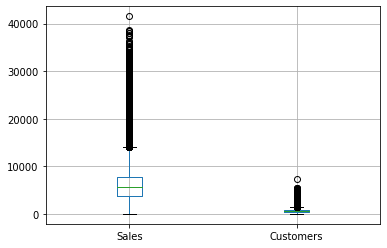

In [30]:
df_train[['Sales', 'Customers']].boxplot()

For the test data we can do nothing.